# Interactive Visualization of CMAQ Outputs

**Author:** Michael Needham, US EPA Region 7 Air and Radiation Division

**Contact:** needham.michael@epa.gov

**Description:** Demonstrate how to generate interactive visualiztions using using __[HoloViews](https://holoviews.org/)__ with the __[Bokeh](https://docs.bokeh.org/en/latest/index.html)__ backend. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import IFrame

import holoviews as hv
import xarray as xr

ERROR 1: PROJ: proj_create_from_database: Open of /work/REGIONS/users/mneedham/.miniforge3/envs/cmaq_pyenv/share/proj failed


In [3]:
from src.utils.cmaq import get_cmaq_metadata, get_cmaq_projection
from src.utils.xarray import display_vars
from src.utils.proj import proj_transform

Each of the previous examples has relied on __[Matplotlib](https://matplotlib.org/)__ as the engine to generate static visualizations. For interactive visualizations, we will rely on __[Bokeh](https://docs.bokeh.org/en/latest/index.html)__ to generate HTML files which can then display our data, and will interact with Bokeh using __[Holoviews](https://holoviews.org/)__.  For more information on how Bokeh and Holoviews are related, see __[this section](https://holoviews.org/user_guide/Plotting_with_Bokeh.html)__ of the Bokeh documentation.

Also, HoloViews works well with gridded datasets natively, or through the related __[geoviews](https://geoviews.org/)__ library.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
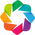

In [4]:
hv.extension("bokeh")

## 1. Data I/O

Read in the data, similar to previous examples. Here we will use one day of 36US3 data to show the diurnal cycle.

In [5]:
file = Path(
    "./tutorial_data/CMAQv54_cb6r5_ae7_aq.36US3.35.DDM_2022_36US3.011.AELMO.2022217/"
)

dset = get_cmaq_metadata(xr.open_dataset(file))
proj = get_cmaq_projection(dset, proj_type="lambert")

# Display the dataset in HTML format
print(f"Dataset size: {dset.nbytes / 1e9:>.3f} GB")
dset

Dataset size: 0.042 GB


<xarray.Dataset> Size: 42MB
Dimensions:  (time: 24, VAR: 17, DATE-TIME: 2, LAY: 1, y: 148, x: 172)
Coordinates:
  * x        (x) float64 1kB 0.0 3.6e+04 7.2e+04 ... 6.12e+06 6.156e+06
  * y        (y) float64 1kB 0.0 3.6e+04 7.2e+04 ... 5.256e+06 5.292e+06
  * time     (time) datetime64[ns] 192B 2022-08-05 ... 2022-08-05T23:00:00
Dimensions without coordinates: VAR, DATE-TIME, LAY
Data variables: (12/18)
    TFLAG    (time, VAR, DATE-TIME) int32 3kB ...
    NO2      (time, LAY, y, x) float32 2MB ...
    FORM     (time, LAY, y, x) float32 2MB ...
    SO2      (time, LAY, y, x) float32 2MB ...
    O3       (time, LAY, y, x) float32 2MB ...
    PM25     (time, LAY, y, x) float32 2MB ...
    ...       ...
    ZH       (time, LAY, y, x) float32 2MB ...
    CFRAC    (time, LAY, y, x) float32 2MB ...
    PV       (time, LAY, y, x) float32 2MB ...
    CO       (time, LAY, y, x) float32 2MB ...
    NH3      (time, LAY, y, x) float32 2MB ...
    AOD_550  (time, LAY, y, x) float32 2MB ...
Attributes: (12/33)
    IOAPI_VERSION:  ioapi-3.2: $Id: init3.F90 247 2023-03-22 15:59:19Z coats ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2024156
    CTIME:          190724
    WDATE:          2024156
    ...             ...
    VGLVLS:         [1.     0.9975]
    GDNAM:          36US3           
    UPNAM:          OPEN_ELMO       
    VAR-LIST:       NO2             FORM            SO2             O3       ...
    FILEDESC:       Parameters Relevant for PM Formation and Distribution    ...
    HISTORY:

In [6]:
display_vars(dset)

--------------------------------------------------------------------------------
| VARNAME          | UNITS            | DESCRIPTION
--------------------------------------------------------------------------------
| TFLAG            | <YYYYDDD,HHMMSS> | Timestep-valid flags:  (1) YYYYDDD or (2) HHMMSS                                
| NO2              | ppmV             | Average Molar Mixing Ratio of NO2                                               
| FORM             | ppmV             | Average Molar Mixing Ratio of FORM                                              
| SO2              | ppmV             | Average Molar Mixing Ratio of SO2                                               
| O3               | ppmV             | Average Molar Mixing Ratio of O3                                                
| PM25             | ug m-3           | Bulk PM2.5 Concentration                                                        
------------------------------------------------------------

## 2. Example: Interactive Timeseries

First, we will subset our xarray dataset into a 2D pandas dataframe. From this we can generate a simple timeseries plot with some __[interactive tools](https://holoviews.org/user_guide/Plotting_with_Bokeh.html#tools)__ (specifically, the "hover" tool in addition to all of the default interactive tools)

In [7]:
# Get coordinates for DENVER in the Lambert projection. We will use this to
# index our dataset
x, y = proj_transform(point_start=(-104.990, 39.739), proj_final=proj)

# Select the nearest CMAQ gridcell to our coordinates.
df = (
    dset.sel(x=x, y=y, method="nearest")[["O3", "NO2", "TA"]]
    .isel(LAY=0)
    .to_dataframe()
    .reset_index()
)

# Convert ppm to ppb for plotting
df["O3"] *= 1e3
df["NO2"] *= 1e3

df.head()

,time,O3,NO2,TA,x,y
0,2022-08-05 00:00:00,58.111721,1.817981,305.730835,2268000.0,2772000.0
1,2022-08-05 01:00:00,51.234489,3.040977,303.915283,2268000.0,2772000.0
2,2022-08-05 02:00:00,42.404644,4.748935,301.314178,2268000.0,2772000.0
3,2022-08-05 03:00:00,35.940830,5.401487,299.318176,2268000.0,2772000.0
4,2022-08-05 04:00:00,32.005367,4.962722,298.296692,2268000.0,2772000.0


### 2.A Generate a simple interactive plot

We will generate a __[layout](https://holoviews.org/reference/containers/bokeh/Layout.html)__ based on various HoloViews objects (e.g., __[Curve](https://holoviews.org/reference/elements/plotly/Curve.html#curve)__, __[Scatter](https://holoviews.org/reference/elements/bokeh/Scatter.html)__, or any of the other __[HoloViews Elements](https://holoviews.org/reference/index.html#elements)__). Once this layout is constructed, we will save it to a HTML file, and then display it within the Jupyter notebook using a __[IPython.display.IFrame](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.IFrame)__ instance.

In [8]:
# Temporary filename
filename = "./tmp/tmp.html"

# Generate the layout
curve = hv.Curve(df, kdims=["time"], vdims=["O3"]).opts(color="blue")
scatter = hv.Scatter(df, kdims=["time"], vdims=["O3"]).opts(
    color="blue", size=15, tools=["hover"]
)
layout = (curve * scatter).opts(width=700, height=450)

# Save the layout, then Display using IPython.display.IFrame
hv.save(layout, filename)
IFrame(filename, width=750, height=500)

### 2.B A second timeseries with additional customizations

For this second timeseries example, we will add additional fields which all use the same time axis with different vertical axes. Note that the interactivity can be used to adjust the limits on each of the separate axes independently (i.e., by spinning the scroll wheel while the mouse pointer is over a specific axis). We will also use a HoloViews __[plot hook](https://holoviews.org/user_guide/Customizing_Plots.html#plot-hooks)__ to access the underlying Bokeh object for additional plot customization

In [9]:
# Add three fields onto our plot
layouts = []
for field, units, color in zip(
    ["TA", "O3", "NO2"], ["K", "ppb", "ppb"], ["red", "blue", "green"]
):

    # Use this short Hook function to change the color of the y-axis for
    # each plot
    def hook(plot, element, color=color):
        plot.handles["yaxis"].axis_label_text_color = color
        plot.handles["yaxis"].axis_line_color = color
        plot.handles["yaxis"].minor_tick_line_color = color
        plot.handles["yaxis"].major_tick_line_color = color
        plot.handles["yaxis"].major_label_text_color = color

    # The tooltips provides additional customization / formatting for the
    # hover tool
    hover_tooltips = [
        ("Time", "@time"),
        (f"{field}", f"@{field} ppb"),
    ]

    # Build the individual layout for each of the looped fields and add to the
    # layout list
    curve = hv.Curve(df, kdims=["time"], vdims=[field], label=field).opts(
        color=color, hooks=[hook]
    )
    scatter = hv.Scatter(curve).opts(
        color=color, size=15, hover_tooltips=hover_tooltips
    )
    layout = curve * scatter
    layouts.append(layout)

# Combine the three layouts to a single layout that is then saved and displayed
# through the IFrame. Use multi_y=True to draw each field on separate axes
layout = (layouts[0] * layouts[1] * layouts[2]).opts(
    width=700, height=450, multi_y=True
)

hv.save(layout, filename)
IFrame(filename, width=750, height=500)

## 3. Example: Interactive Map

We can also generate interactive maps of our data (more advanced capability is shown in the next example). For this, we will transform our data from an xarray dataset to a __[holoviews dataset (hv.Dataset)](https://holoviews.org/reference_manual/holoviews.core.html#holoviews.core.Dataset)__. For more information, see __[gridded datasets](https://holoviews.org/getting_started/Gridded_Datasets.html)__ from the HoloViews documentation. 

In this instance we will render our data as a __[hv.Image](https://holoviews.org/reference/elements/matplotlib/Image.html)__ although in certain circumstances it may be more appropriate to render as a __[hv.QuadMesh](https://holoviews.org/reference/elements/matplotlib/QuadMesh.html)__, although the latter appears to be slower.

In [10]:
# convert O3 from ppm to ppb and format this xr.DataArray as a hv.Dataset
dset_hv = hv.Dataset(dset["O3"] * 1e3)
dset_hv

:Dataset   [x,y,time]   (O3)

In [11]:
filename = "./tmp/tmp.html"

img = dset_hv.to(hv.Image, ["x", "y"], "O3")
img = img.opts(
    width=600,
    height=600,
    data_aspect=1.0,
    cmap="inferno",
    clim=(0, 85),
    colorbar=True,
    tools=["hover"],
)

# Add an adjoining histogram
hist = img.hist(dimension=["O3"], bin_range=(0, 120), num_bins=24, adjoin=True)

layout = img * hist

hv.save(layout, filename)

IFrame(filename, width=1100, height=750)